# **ALGORITMO K - CENTER**

## *Wholesale Customers Dataset*

### Importaciones

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import seaborn as sns
from sklearn.decomposition import PCA

### Mostrar información del Dataset

In [2]:
np.random.seed(42)
plt.style.use('seaborn-v0_8')
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
wholesale_data = pd.read_csv(url)

print("=== WHOLESALE CUSTOMERS DATASET ===")
print(f"Dimensiones del dataset: {wholesale_data.shape}")
print("\nPrimeras 10 filas:")
display(wholesale_data.head(10))

print("\nInformación del dataset:")
print(wholesale_data.info())

print("\nEstadísticas descriptivas:")
display(wholesale_data.describe())

print("\nValores únicos en Channel y Region:")
print("Channel:", wholesale_data['Channel'].unique())
print("Region:", wholesale_data['Region'].unique())

=== WHOLESALE CUSTOMERS DATASET ===
Dimensiones del dataset: (440, 8)

Primeras 10 filas:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None

Estadísticas descriptivas:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000



Valores únicos en Channel y Region:
Channel: [2 1]
Region: [3 1 2]


### Distribución de gastos
La distribución de gastos se refiere a cómo se reparten los valores de cada una de esas variables:
si los clientes gastan poco, mucho o de forma muy desigual entre categorías.

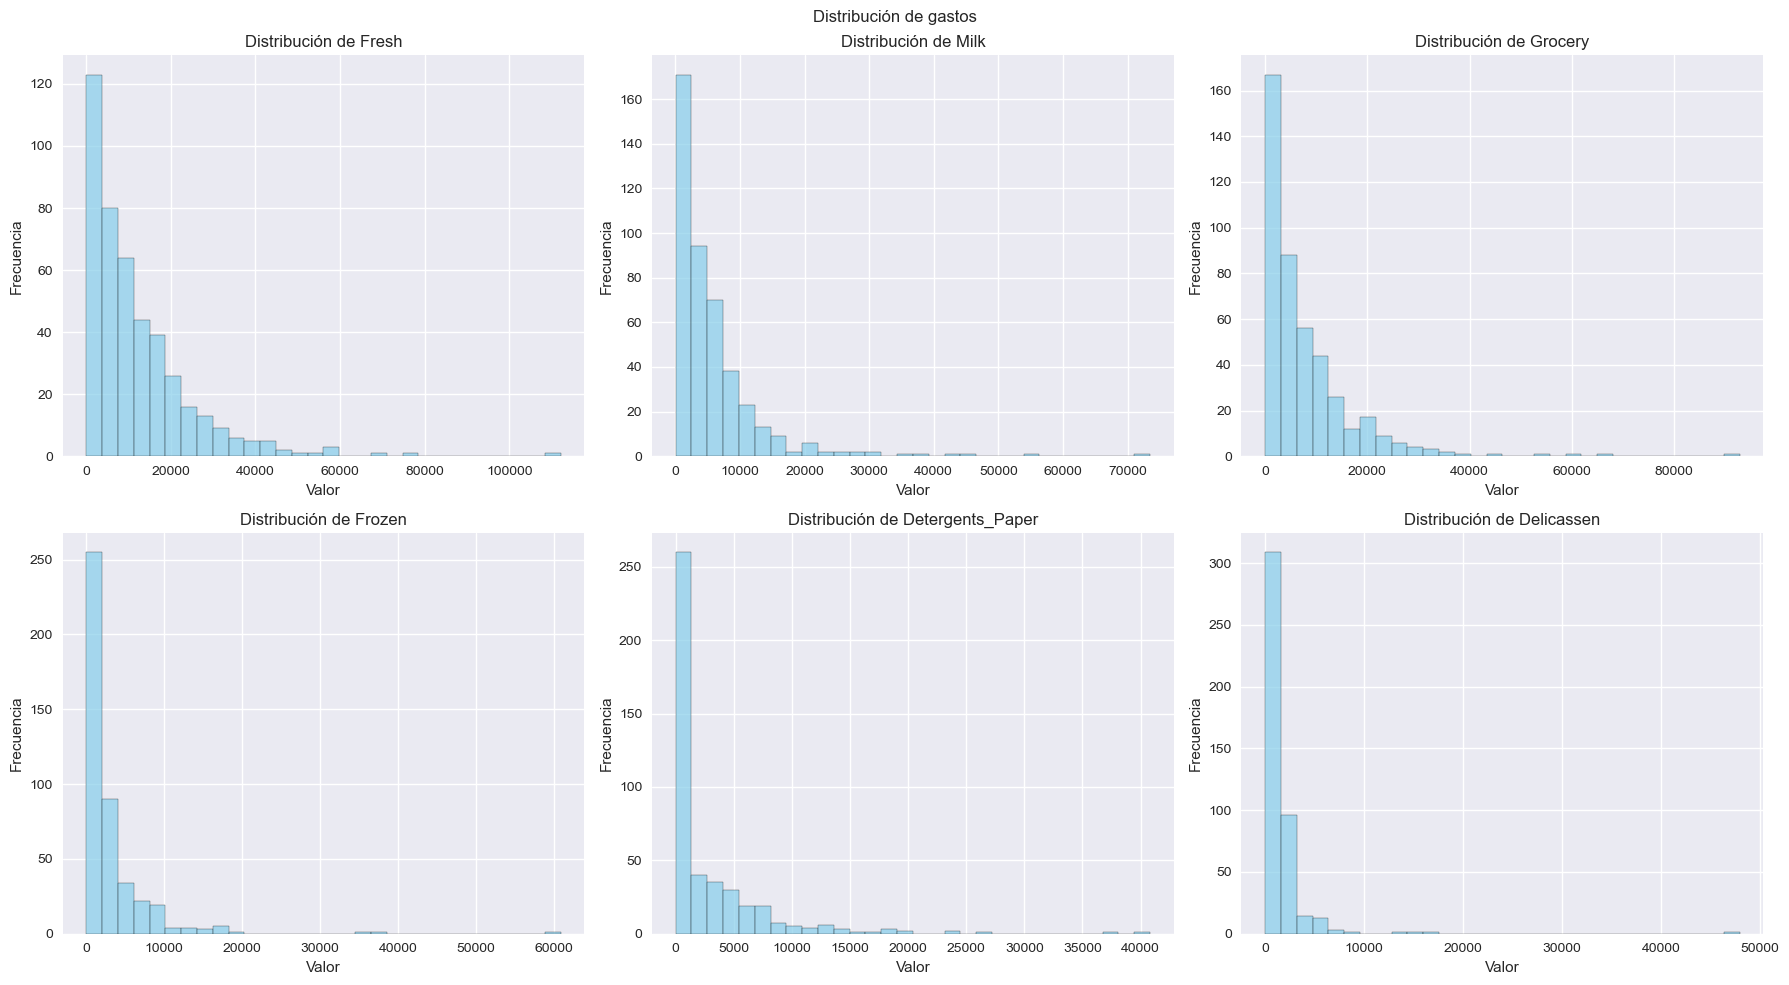

In [3]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

for idx, feature in enumerate(features):
    row = idx // 3
    col = idx % 3
    axes[row, col].hist(wholesale_data[feature], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[row, col].set_title(f'Distribución de {feature}')
    axes[row, col].set_xlabel('Valor')
    axes[row, col].set_ylabel('Frecuencia')

plt.suptitle('Distribución de gastos')
plt.tight_layout()
plt.show()

### Matriz de confusión

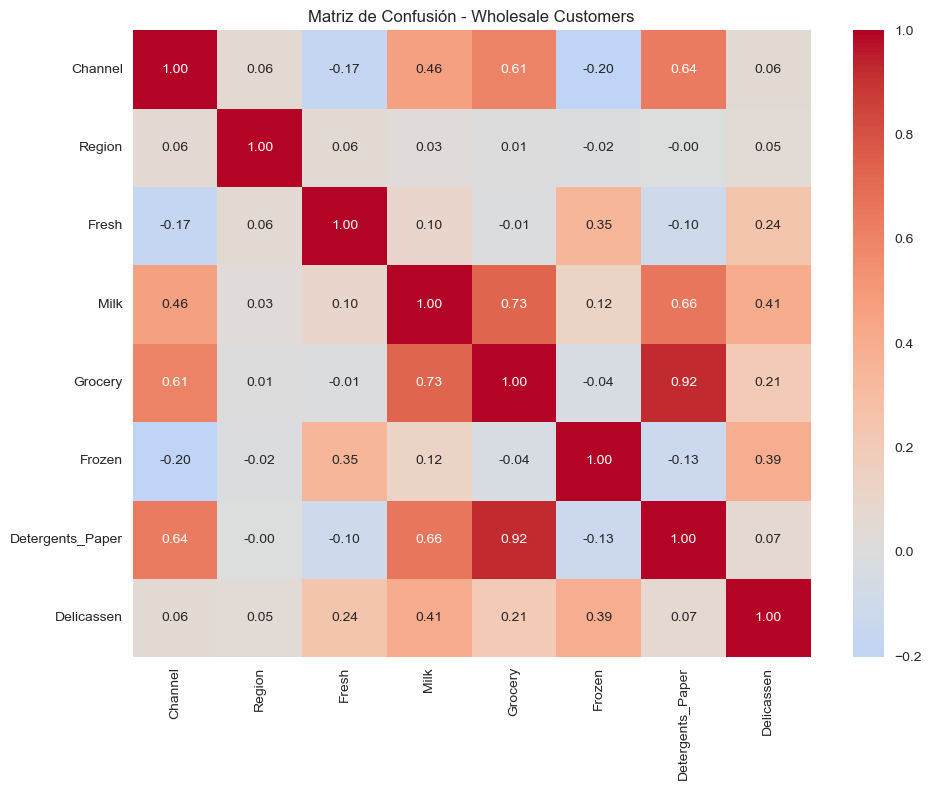

In [4]:
confusion_matrix = wholesale_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matriz de Confusión - Wholesale Customers')
plt.tight_layout()
plt.show()

Nos quedamos únicamente con las variables relevantes para agrupar clientes según sus patrones de consumo:

In [5]:
X = wholesale_data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Datos originales (primeras 5 filas):")
print(X[:5])
print("\nDatos escalados (primeras 5 filas):")
print(X_scaled[:5])

Datos originales (primeras 5 filas):
[[12669  9656  7561   214  2674  1338]
 [ 7057  9810  9568  1762  3293  1776]
 [ 6353  8808  7684  2405  3516  7844]
 [13265  1196  4221  6404   507  1788]
 [22615  5410  7198  3915  1777  5185]]

Datos escalados (primeras 5 filas):
[[ 0.05293319  0.52356777 -0.04111489 -0.58936716 -0.04356873 -0.06633906]
 [-0.39130197  0.54445767  0.17031835 -0.27013618  0.08640684  0.08915105]
 [-0.44702926  0.40853771 -0.0281571  -0.13753572  0.13323164  2.24329255]
 [ 0.10011141 -0.62401993 -0.3929769   0.6871443  -0.49858822  0.09341105]
 [ 0.84023948 -0.05239645 -0.07935618  0.17385884 -0.23191782  1.29934689]]


### Implementación de K - Center

In [6]:
n_samples, n_features = X_scaled.shape
k = 3

centers_indices = [np.random.randint(0, n_samples)]
centers = [X_scaled[centers_indices[0]]]
distances = np.linalg.norm(X_scaled - centers[0], axis=1)

print(f"Paso 1: Centro inicial seleccionado en índice {centers_indices[0]}")
print(f"Coordenadas del primer centro: {centers[0]}")

for i in range(1, k):
    next_center_idx = np.argmax(distances)
    centers_indices.append(next_center_idx)
    centers.append(X_scaled[next_center_idx])
    
    new_distances = np.linalg.norm(X_scaled - centers[-1], axis=1)
    distances = np.minimum(distances, new_distances)
    
    print(f"\nPaso {i+1}: Centro seleccionado en índice {next_center_idx}")
    print(f"Distancia máxima actual: {np.max(distances):.4f}")

kcenter_centers = np.array(centers)
kcenter_centers_indices = centers_indices
final_radius = np.max(distances)

print(f"\nRadio final del clustering: {final_radius:.4f}")
print(f"Índices de los centros: {kcenter_centers_indices}")

Paso 1: Centro inicial seleccionado en índice 102
Coordenadas del primer centro: [-0.71782906  0.08989899 -0.02889454 -0.10536516  0.35517701 -0.04929905]

Paso 2: Centro seleccionado en índice 183
Distancia máxima actual: 12.9954

Paso 3: Centro seleccionado en índice 85
Distancia máxima actual: 12.4590

Radio final del clustering: 12.4590
Índices de los centros: [102, np.int64(183), np.int64(85)]


#### **Asignación de cada punto a su centro más cercano**

In [7]:
labels = []
for i, point in enumerate(X_scaled):
    distances_to_centers = [np.linalg.norm(point - center) for center in kcenter_centers]
    cluster_assignment = np.argmin(distances_to_centers)
    labels.append(cluster_assignment)

kcenter_labels = np.array(labels)

wholesale_data['Cluster'] = kcenter_labels

cluster_summary = wholesale_data.groupby('Cluster')[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].mean()
print("=== RESUMEN POR CLUSTER ===")
display(cluster_summary)

cluster_counts = wholesale_data['Cluster'].value_counts().sort_index()
print("\nNúmero de clientes por cluster:")
print(cluster_counts)

=== RESUMEN POR CLUSTER ===


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
0,11786.334101,5274.43318,7306.523041,2999.852535,2575.453917,1404.276498
1,36847.000000,43950.00000,20170.000000,36534.000000,239.000000,47943.000000
2,25603.000000,43460.60000,61472.200000,2636.000000,29974.200000,2708.800000



Número de clientes por cluster:
Cluster
0    434
1      1
2      5
Name: count, dtype: int64


### Mostrar la distribución espacial de los clusters y la posición de sus centros.

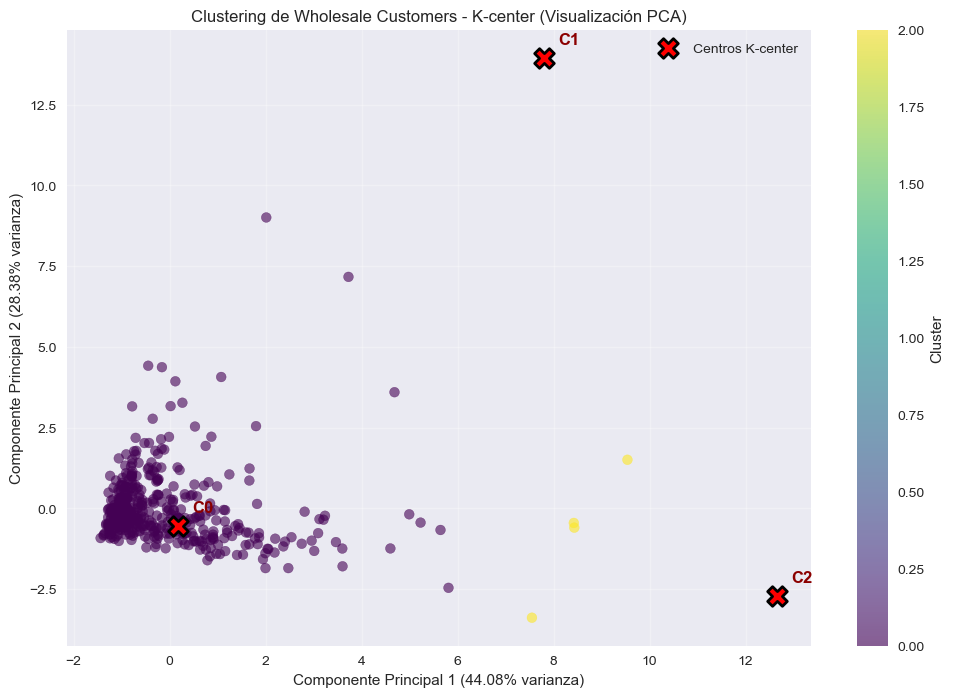

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centers_pca = pca.transform(kcenter_centers)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kcenter_labels, cmap='viridis', alpha=0.6, s=50)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='X', s=200, label='Centros K-center', edgecolors='black', linewidth=2)

for i, center_idx in enumerate(kcenter_centers_indices):
    plt.annotate(f'C{i}', (centers_pca[i, 0], centers_pca[i, 1]), 
                 xytext=(10, 10), textcoords='offset points', 
                 fontsize=12, fontweight='bold', color='darkred')

plt.colorbar(scatter, label='Cluster')
plt.xlabel(f'Componente Principal 1 ({pca.explained_variance_ratio_[0]:.2%} varianza)')
plt.ylabel(f'Componente Principal 2 ({pca.explained_variance_ratio_[1]:.2%} varianza)')
plt.title('Clustering de Wholesale Customers - K-center (Visualización PCA)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Interpretación del cluster.
Este conjunto de gráficas explica “quién gasta qué” en cada cluster, lo que hace que los resultados del K-Center sean interpretables y accionables, no solo números.

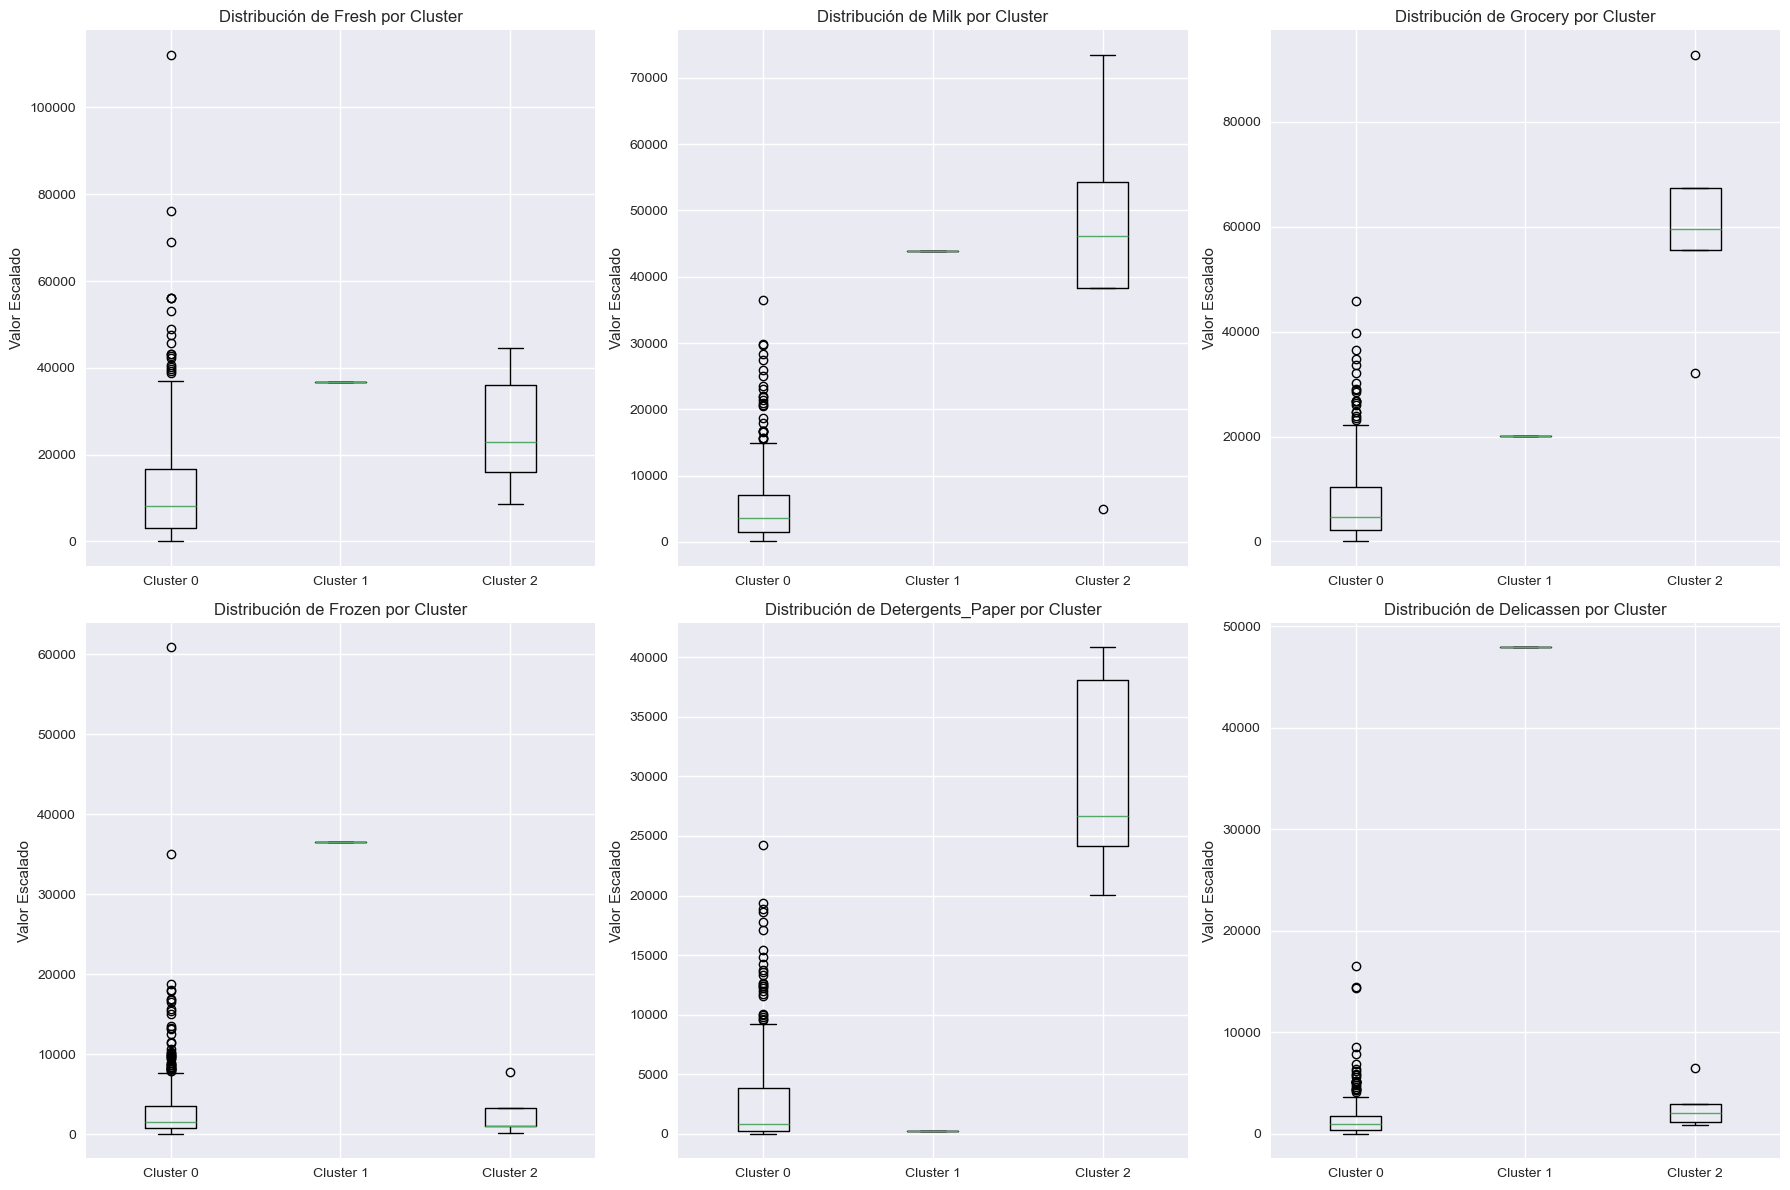

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

for idx, feature in enumerate(features):
    row = idx // 3
    col = idx % 3
    
    cluster_data = [wholesale_data[wholesale_data['Cluster'] == i][feature] for i in range(k)]
    axes[row, col].boxplot(cluster_data, tick_labels=[f'Cluster {i}' for i in range(k)])
    axes[row, col].set_title(f'Distribución de {feature} por Cluster')
    axes[row, col].set_ylabel('Valor Escalado')

plt.tight_layout()
plt.show()

### Cálculo de métricas

=== MÉTRICAS DE EVALUACIÓN ===
Silhouette Score: 0.7676
Calinski-Harabasz Score: 97.88
Radio del clustering: 12.4590

Tamaño de clusters: {0: np.int64(434), 1: np.int64(1), 2: np.int64(5)}


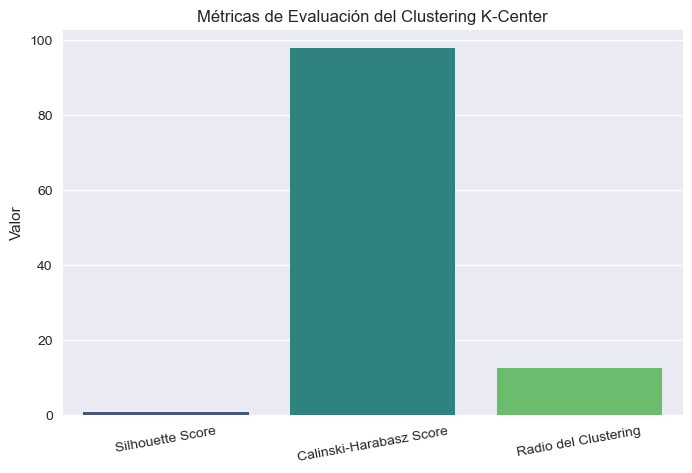

In [15]:
silhouette_avg = silhouette_score(X_scaled, kcenter_labels)
calinski_avg = calinski_harabasz_score(X_scaled, kcenter_labels)

print("=== MÉTRICAS DE EVALUACIÓN ===")
print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Calinski-Harabasz Score: {calinski_avg:.2f}")
print(f"Radio del clustering: {final_radius:.4f}")

if 'Cluster' in wholesale_data.columns:
	cluster_sizes = wholesale_data['Cluster'].value_counts().sort_index()
	print(f"\nTamaño de clusters: {dict(cluster_sizes)}")
else:
	print("\n[ADVERTENCIA] La columna 'Cluster' no existe en 'wholesale_data'. Ejecute la celda de clustering primero.")

plt.style.use('seaborn-v0_8')

metrics_df = pd.DataFrame({
    "Métrica": ["Silhouette Score", "Calinski-Harabasz Score", "Radio del Clustering"],
    "Valor": [silhouette_avg, calinski_avg, final_radius]
})

plt.figure(figsize=(8,5))
sns.barplot(data=metrics_df, x="Métrica", y="Valor", hue="Métrica", palette="viridis", legend=False)
plt.title("Métricas de Evaluación del Clustering K-Center")
plt.ylabel("Valor")
plt.xlabel("")
plt.xticks(rotation=10)
plt.show()

### Interpretación de clusters

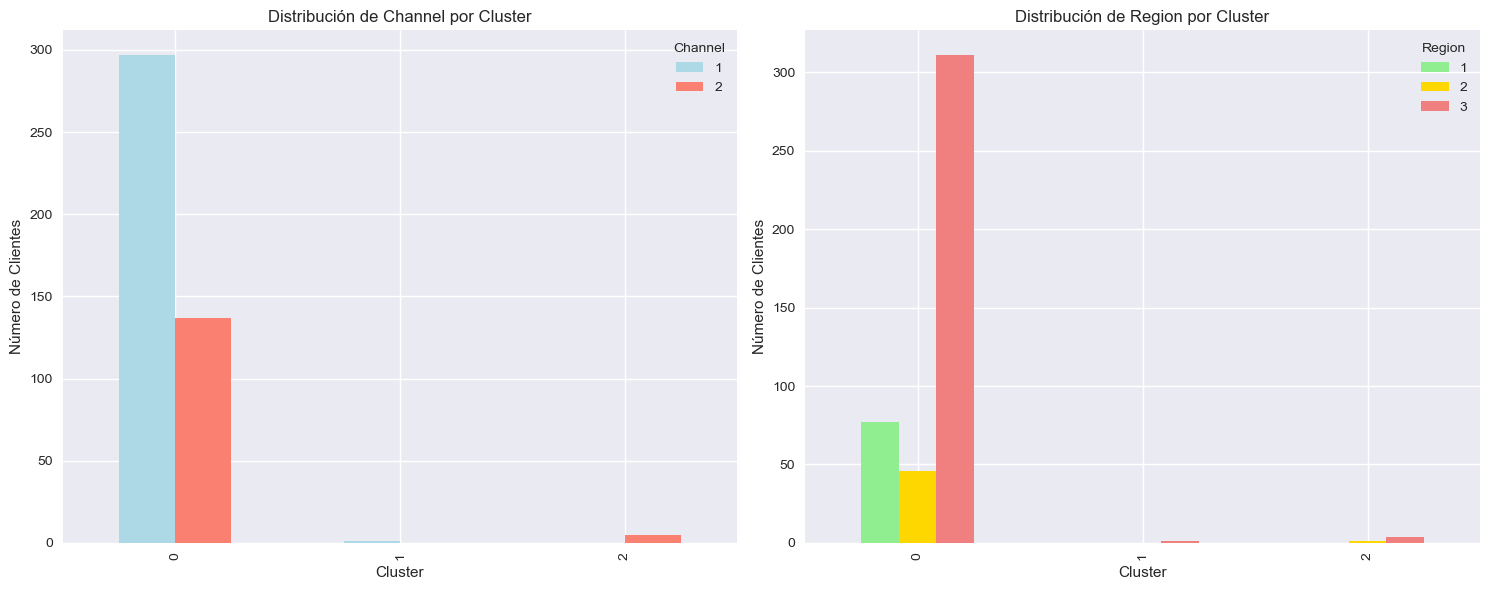

In [11]:
channel_cluster_cross = pd.crosstab(wholesale_data['Cluster'], wholesale_data['Channel'])
region_cluster_cross = pd.crosstab(wholesale_data['Cluster'], wholesale_data['Region'])

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

channel_cluster_cross.plot(kind='bar', ax=axes[0], color=['lightblue', 'salmon'])
axes[0].set_title('Distribución de Channel por Cluster')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Número de Clientes')
axes[0].legend(title='Channel')

region_cluster_cross.plot(kind='bar', ax=axes[1], color=['lightgreen', 'gold', 'lightcoral'])
axes[1].set_title('Distribución de Region por Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Número de Clientes')
axes[1].legend(title='Region')

plt.tight_layout()
plt.show()

### Perfil de cada Cluster

In [12]:
cluster_profiles = wholesale_data.groupby('Cluster').agg({
    'Fresh': 'mean',
    'Milk': 'mean', 
    'Grocery': 'mean',
    'Frozen': 'mean',
    'Detergents_Paper': 'mean',
    'Delicassen': 'mean',
    'Channel': lambda x: x.mode()[0],
    'Region': lambda x: x.mode()[0]
}).round(2)

print("=== PERFIL DE CADA CLUSTER ===")

for cluster_id in range(k):
    cluster_data = wholesale_data[wholesale_data['Cluster'] == cluster_id]
    print(f"\n--- CLUSTER {cluster_id} ({len(cluster_data)} clientes) ---")
    
    print("Características promedio:")
    for feature in features:
        mean_val = cluster_data[feature].mean()
        print(f"  {feature}: {mean_val:,.0f}")
    
    channel_dist = cluster_data['Channel'].value_counts()
    region_dist = cluster_data['Region'].value_counts()
    
    print(f"Channel predominante: {channel_dist.index[0]} ({channel_dist.iloc[0]} clientes)")
    print(f"Region predominante: {region_dist.index[0]} ({region_dist.iloc[0]} clientes)")
    
    if cluster_data['Grocery'].mean() > cluster_data['Fresh'].mean():
        print("Perfil: Orientado a productos de supermercado")
    elif cluster_data['Fresh'].mean() > cluster_data['Grocery'].mean():
        print("Perfil: Orientado a productos frescos")
    else:
        print("Perfil: Balanceado")

=== PERFIL DE CADA CLUSTER ===

--- CLUSTER 0 (434 clientes) ---
Características promedio:
  Fresh: 11,786
  Milk: 5,274
  Grocery: 7,307
  Frozen: 3,000
  Detergents_Paper: 2,575
  Delicassen: 1,404
Channel predominante: 1 (297 clientes)
Region predominante: 3 (311 clientes)
Perfil: Orientado a productos frescos

--- CLUSTER 1 (1 clientes) ---
Características promedio:
  Fresh: 36,847
  Milk: 43,950
  Grocery: 20,170
  Frozen: 36,534
  Detergents_Paper: 239
  Delicassen: 47,943
Channel predominante: 1 (1 clientes)
Region predominante: 3 (1 clientes)
Perfil: Orientado a productos frescos

--- CLUSTER 2 (5 clientes) ---
Características promedio:
  Fresh: 25,603
  Milk: 43,461
  Grocery: 61,472
  Frozen: 2,636
  Detergents_Paper: 29,974
  Delicassen: 2,709
Channel predominante: 2 (5 clientes)
Region predominante: 3 (4 clientes)
Perfil: Orientado a productos de supermercado


### Traducción de los resultados a la realidad.
- Mostrar el patrón de consumo típico de cada cluster en unidades monetarias reales.
- Ideal para explicar en presentación qué tipo de clientes representa cada cluster.

=== CENTROS DE CLUSTERS EN ESCALA ORIGINAL ===


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2932.0,6459.0,7677.0,2561.0,4573.0,1386.0,0
1,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,1
2,16117.0,46197.0,92780.0,1026.0,40827.0,2944.0,2


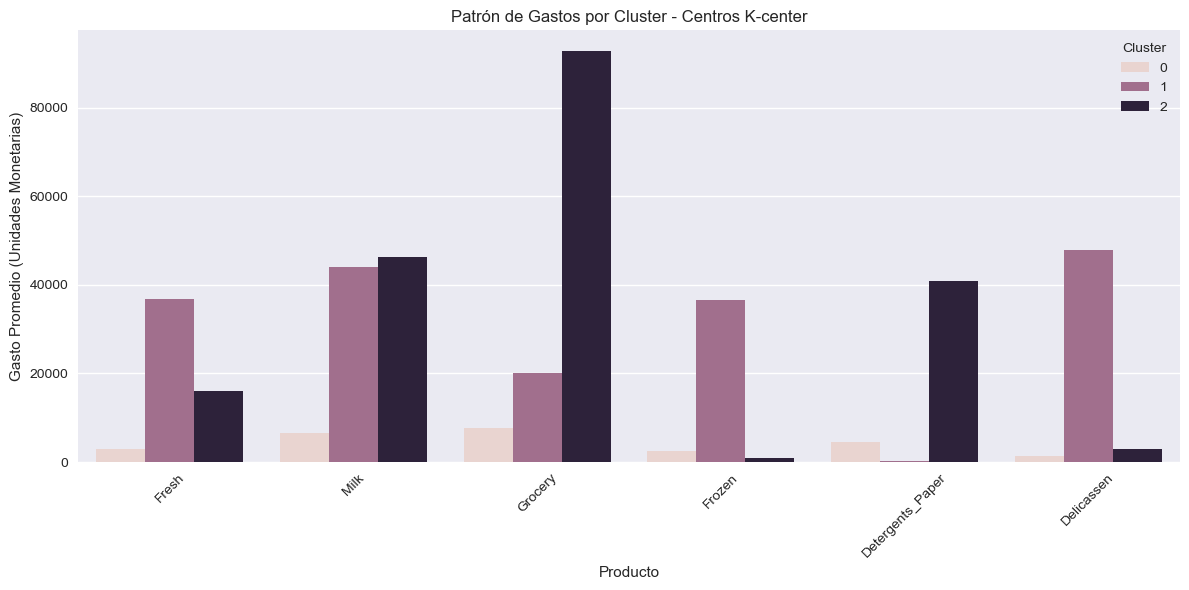

In [13]:
original_centers = scaler.inverse_transform(kcenter_centers)
centers_df = pd.DataFrame(original_centers, columns=features)
centers_df['Cluster'] = range(k)

print("=== CENTROS DE CLUSTERS EN ESCALA ORIGINAL ===")
display(centers_df)

plt.figure(figsize=(12, 6))
centers_df_melted = centers_df.melt(id_vars=['Cluster'], var_name='Producto', value_name='Gasto Promedio')
sns.barplot(data=centers_df_melted, x='Producto', y='Gasto Promedio', hue='Cluster')
plt.title('Patrón de Gastos por Cluster - Centros K-center')
plt.xticks(rotation=45)
plt.ylabel('Gasto Promedio (Unidades Monetarias)')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()